# AuNR DA Figure S4

In [23]:
import sys
# add path for my packages
sys.path.append('./datasets')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression

%precision 3
%matplotlib inline

# use my matplotlib style
plt.style.use('./datasets/my_rc_setting.mplstyle')

## input data

In [24]:
# all glass data
glass_data = pd.read_csv('./datasets/090723_glass_training.csv')
glass_data['ratio'] = glass_data['length'] / glass_data['width']
glass_data = glass_data.drop(['R2'], axis=1)
glass_data['volume'] = np.pi*(glass_data['width']**2)*glass_data['length']/4 - np.pi*(glass_data['width']**3)/12

# all ITO data
ito_data = pd.read_csv('./datasets/111623_ito_training.csv')
ito_data['ratio'] = ito_data['length'] / ito_data['width']
ito_data = ito_data.drop(['corrcoef'], axis=1)
ito_data['volume'] = np.pi*(ito_data['width']**2)*ito_data['length']/4 - np.pi*(ito_data['width']**3)/12

# further control the dataset so that all aspect ratio in glass can fall into the range of ITO's ratio
ito_ratio_min = ito_data['ratio'].min()
ito_ratio_max = ito_data['ratio'].max()

glass_data = glass_data[(glass_data['ratio'] > ito_ratio_min) & (glass_data['ratio'] < ito_ratio_max)]
glass_data = glass_data.reset_index(drop=True)
print(glass_data.shape)

# further control the dataset so that all width and length in glass can fal into the range of ITO's
ito_width_min = ito_data['width'].min()
ito_width_max = ito_data['width'].max()
ito_length_min = ito_data['length'].min()
ito_length_max = ito_data['length'].max()

ito_data = ito_data[ito_data['ratio'] <= 4.4]
print(ito_data.shape)

glass_data = glass_data[(glass_data['width'] > ito_width_min) & (glass_data['width'] < ito_width_max)]
glass_data = glass_data[(glass_data['length'] > ito_length_min) & (glass_data['length'] < ito_length_max)]
glass_data = glass_data.reset_index(drop=True)
print(glass_data.shape)

# Randomly sample 1000 rows from each dataframe
glass_data_sampled = glass_data.sample(n=1000, random_state=42)
# glass_data_sampled = glass_data_sampled.reset_index(drop=True)
ito_data_sampled = ito_data.sample(n=1000, random_state=42)
# ito_data_sampled = ito_data_sampled.reset_index(drop=True)
print(glass_data_sampled.shape)

original_data = pd.read_csv('./datasets/New_SPP.csv')
original_data['ratio'] = original_data['length'] / original_data['width']
print(original_data.shape)

(1205, 7)
(3285, 7)
(1191, 7)
(1000, 7)
(576, 6)


In [25]:
# Assuming original datasets are 'original_glass_data' and 'original_ito_data'
# Find rows not in the sampled data
glass_not_sampled = glass_data[~glass_data.index.isin(glass_data_sampled.index)]
ito_not_sampled = ito_data[~ito_data.index.isin(ito_data_sampled.index)]

# Reset indices of the resulting dataframes for cleanliness
glass_not_sampled = glass_not_sampled.reset_index(drop=True)
ito_not_sampled = ito_not_sampled.reset_index(drop=True)

# Print the shapes of the subsets that were not randomly chosen
print(glass_not_sampled.shape)
print(ito_not_sampled.shape)

(191, 7)
(2285, 7)


In [26]:
large_size_data = original_data[original_data['width'] > 60]
print(large_size_data.shape)
large_ar_data = original_data[(original_data['ratio'] > 4)]
print(large_ar_data.shape)

(75, 6)
(195, 6)


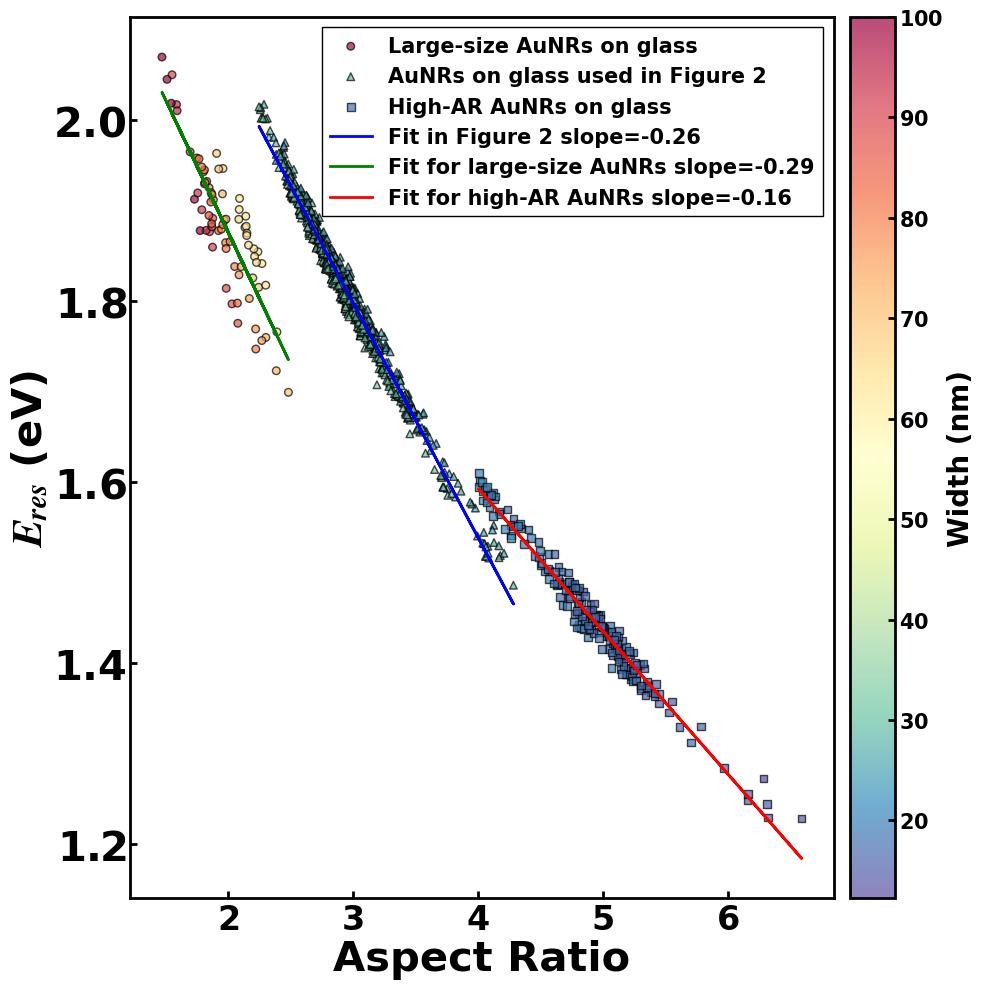

In [27]:
fig, ax1 = plt.subplots(figsize=(10, 10))

model1 = LinearRegression()
model1.fit(glass_data_sampled['ratio'].values.reshape(-1, 1), glass_data_sampled['eres'])
slope1, intercept1 = model1.coef_[0], model1.intercept_

model2 = LinearRegression()
model2.fit(large_size_data['ratio'].values.reshape(-1, 1), large_size_data['eres'])
slope2, intercept2 = model2.coef_[0], model2.intercept_

model3 = LinearRegression()
model3.fit(large_ar_data['ratio'].values.reshape(-1, 1), large_ar_data['eres'])
slope3, intercept3 = model3.coef_[0], model3.intercept_

combined_data = pd.concat([glass_data, original_data], axis=0)
# Define a shared color normalization based on the range of 'width'
norm = mcolors.Normalize(vmin=combined_data['width'].min(), vmax=combined_data['width'].max())

# Add color variation based on width
sc1 = ax1.scatter(
    large_size_data['ratio'], 
    large_size_data['eres'], 
    s=30, 
    c=large_size_data['width'],  # Color based on width
    cmap='Spectral_r',  # Colormap
    norm=norm,  # Shared normalization
    edgecolor='k', 
    alpha=0.7, 
    label='Large-size AuNRs on glass'
)

# Overlay scatter plot: glass_data_sampled with triangle markers matching sc1 scale
sc2 = ax1.scatter(
    glass_data_sampled['ratio'], 
    glass_data_sampled['eres'], 
    s=30, 
    c=glass_data_sampled['width'],  # Use the same color scale
    cmap='Spectral_r',  # Colormap
    norm=norm,  # Shared normalization
    marker='^',  # Triangle markers
    edgecolor='k', 
    alpha=0.7, 
    label='AuNRs on glass used in Figure 2'
)

# Overlay scatter plot: glass_data_sampled with triangle markers matching sc1 scale
sc3 = ax1.scatter(
    large_ar_data['ratio'], 
    large_ar_data['eres'], 
    s=30, 
    c=large_ar_data['width'],  # Use the same color scale
    cmap='Spectral_r',  # Colormap
    norm=norm,  # Shared normalization
    marker='s',  # Triangle markers
    edgecolor='k', 
    alpha=0.7, 
    label='High-AR AuNRs on glass'
)

ax1.plot(glass_data_sampled['ratio'], slope1 * glass_data_sampled['ratio'] + intercept1, 
         c='b', lw=2, label=f'Fit in Figure 2 slope={round(slope1, 2)}')

ax1.plot(large_size_data['ratio'], slope2 * large_size_data['ratio'] + intercept2, 
         c='g', lw=2, label=f'Fit for large-size AuNRs slope={round(slope2, 2)}')

ax1.plot(large_ar_data['ratio'], slope3 * large_ar_data['ratio'] + intercept3, 
         c='r', lw=2, label=f'Fit for high-AR AuNRs slope={round(slope3, 2)}')

ax1.set_ylabel('$E_{res}$ (eV)', fontsize=30)
ax1.set_xlabel('Aspect Ratio', fontsize=30)
ax1.tick_params(axis='y', labelsize=30, pad=2)
ax1.legend(loc='upper right', fontsize=15)

# Add a single shared color bar
cbar = fig.colorbar(sc1, ax=ax1, orientation='vertical', pad=0.02)
cbar.set_label('Width (nm)', fontsize=20)
cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
# Save the figure
# plt.savefig("AuNR_DA_figureS4.png", dpi=300, bbox_inches='tight')